In [3]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [27]:
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.getenv('API_KEY')

In [71]:
%pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/d5/b5/70bb98ee38ce532ee29fab76fb668382291fe6e1aa69a8c1ac7e6bc108e7/yfinance-0.2.38-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for html5lib>=1.1 from https://files.pythonhosted.org/packages/6c/dd/a834df6482147d48e225a49515aabc28974a

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pal = sns.color_palette()

from datetime import datetime, timedelta

import yfinance as yf

### Get historical data from Alphavantage

In [43]:
STOCK_SYMBOL = 'QQQ'

In [52]:
now_date = datetime.now().strftime('%Y-%m')

if not os.path.isfile(f'historic_monthly_1999-11_{now_date}.csv'):
  # Get data from Alphavantage if csv not found
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={STOCK_SYMBOL}&outputsize=full&&apikey={API_KEY}&datatype=csv'
  hist = pd.read_csv(url).sort_values(by='timestamp', ascending=True)
  hist.to_csv(f'historic_monthly_1999-11_{now_date}.csv', index=False)

df = pd.read_csv(f'historic_monthly_1999-11_{now_date}.csv')

df.head()

,timestamp,open,high,low,close,volume
0,1999-11-01,131.5,133.1,130.6,130.8,4840900
1,1999-11-02,131.5,133.1,130.4,130.9,6417400
2,1999-11-03,132.8,134.3,132.4,133.5,9376300
3,1999-11-04,135.4,135.6,133.6,135.0,10024300
4,1999-11-05,137.8,138.4,136.4,136.4,7567300


In [53]:
df.shape

(6176, 6)

### EDA

In [54]:
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'QQQ Closing History'}, xlabel='timestamp'>

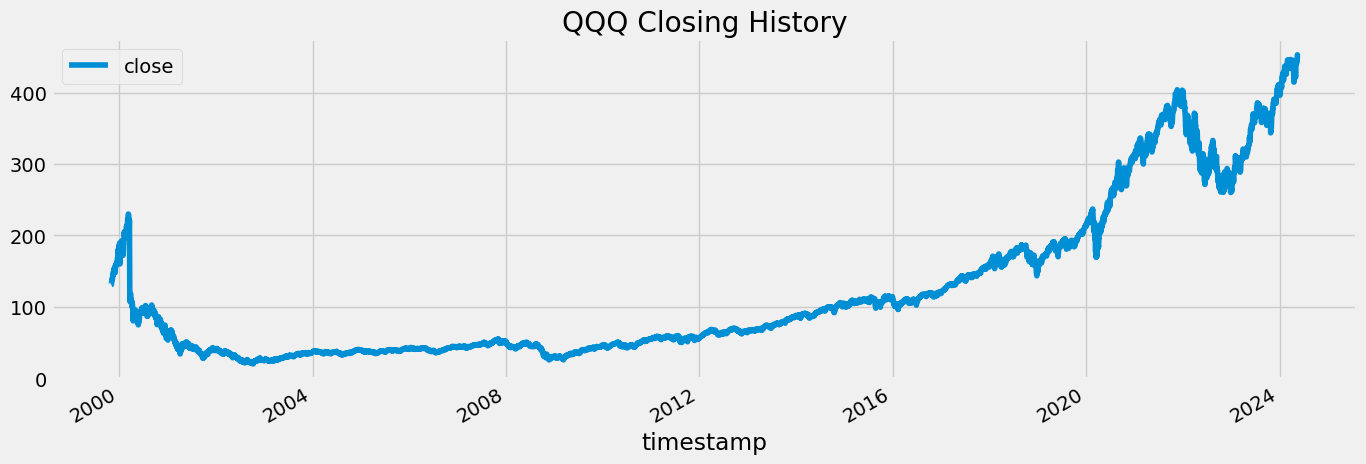

In [57]:
df.plot(
  y=['close'],
  figsize=(15, 5), 
  color=[color_pal[0]],
  title=f'{STOCK_SYMBOL} Closing History'
)

In [58]:
display(df)

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,131.50,133.100,130.6000,130.80,4840900
1999-11-02,131.50,133.100,130.4000,130.90,6417400
1999-11-03,132.80,134.300,132.4000,133.50,9376300
1999-11-04,135.40,135.600,133.6000,135.00,10024300
1999-11-05,137.80,138.400,136.4000,136.40,7567300
...,...,...,...,...,...
2024-05-13,443.99,444.090,441.6500,443.08,22994192
2024-05-14,442.65,446.465,442.4600,445.93,34478321
2024-05-15,448.43,453.150,446.9000,452.90,41464651


### Let's get a second set of data from yfinance since it contains adjusted prices so we can compare results with and w/o adjusted prices.

In [59]:
yf_df = yf.download(STOCK_SYMBOL, start='1999-11-01', end=datetime.now().strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
display(yf_df)